In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# readinag given csv file 
# and creating dataframe 
# Define the file path
file_path = (r"C:\Users\Admin.DESKTOP-M4R2VLU\week3\data\MachineLearningRating_v3.txt")

# Read the data into a DataFrame
df = pd.read_csv(file_path, delimiter='|')

# Define the file path for the output CSV file
output_file_path = (r"C:\Users\Admin.DESKTOP-M4R2VLU\week3\data\MachineLearningRating_v3.csv")

# Save the DataFrame to a CSV file
df.to_csv(output_file_path, index=False)

print(f'Data saved to {output_file_path}')

# Display the first few rows of the DataFrame
print(df.tail())

C:\Users\Admin.DESKTOP-M4R2VLU\AppData\Local\Temp\ipykernel_4816\1818582170.py:7: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, delimiter='|')


Data saved to C:\Users\Admin.DESKTOP-M4R2VLU\week3\data\MachineLearningRating_v3.csv
         UnderwrittenCoverID  PolicyID     TransactionMonth  IsVATRegistered  \
1000093                31520       389  2015-04-01 00:00:00            False   
1000094                31520       389  2015-06-01 00:00:00            False   
1000095                31520       389  2015-08-01 00:00:00            False   
1000096                31519       389  2014-07-01 00:00:00            False   
1000097                31519       389  2015-02-01 00:00:00            False   

        Citizenship   LegalType Title Language       Bank      AccountType  \
1000093          ZW  Individual    Mr  English  ABSA Bank  Savings account   
1000094          ZW  Individual    Mr  English  ABSA Bank  Savings account   
1000095          ZW  Individual    Mr  English  ABSA Bank  Savings account   
1000096          ZW  Individual    Mr  English  ABSA Bank  Savings account   
1000097          ZW  Individual    Mr  Engli

In [3]:
#load converted csv file
import pandas as pd 
df = pd.read_csv(r"C:\Users\Admin.DESKTOP-M4R2VLU\week3\data\MachineLearningRating_v3.csv")
df.isna().sum()


C:\Users\Admin.DESKTOP-M4R2VLU\AppData\Local\Temp\ipykernel_4816\579131610.py:3: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"C:\Users\Admin.DESKTOP-M4R2VLU\week3\data\MachineLearningRating_v3.csv")


UnderwrittenCoverID               0
PolicyID                          0
TransactionMonth                  0
IsVATRegistered                   0
Citizenship                       0
LegalType                         0
Title                             0
Language                          0
Bank                         145961
AccountType                   40232
MaritalStatus                  8259
Gender                         9536
Country                           0
Province                          0
PostalCode                        0
MainCrestaZone                    0
SubCrestaZone                     0
ItemType                          0
mmcode                          552
VehicleType                     552
RegistrationYear                  0
make                            552
Model                           552
Cylinders                       552
cubiccapacity                   552
kilowatts                       552
bodytype                        552
NumberOfDoors               

In [4]:
# Descriptive statistics
descriptive_stats = df.describe()

# Calculate variability (standard deviation)
variability = df[['TotalPremium', 'TotalClaims']].std()

print("Descriptive Statistics:\n", descriptive_stats)
print("\nVariability:\n", variability)

Descriptive Statistics:
        UnderwrittenCoverID      PolicyID    PostalCode        mmcode  \
count         1.000098e+06  1.000098e+06  1.000098e+06  9.995460e+05   
mean          1.048175e+05  7.956682e+03  3.020601e+03  5.487770e+07   
std           6.329371e+04  5.290039e+03  2.649854e+03  1.360381e+07   
min           1.000000e+00  1.400000e+01  1.000000e+00  4.041200e+06   
25%           5.514300e+04  4.500000e+03  8.270000e+02  6.005692e+07   
50%           9.408300e+04  7.071000e+03  2.000000e+03  6.005842e+07   
75%           1.391900e+05  1.107700e+04  4.180000e+03  6.005842e+07   
max           3.011750e+05  2.324600e+04  9.870000e+03  6.506535e+07   

       RegistrationYear      Cylinders  cubiccapacity      kilowatts  \
count      1.000098e+06  999546.000000  999546.000000  999546.000000   
mean       2.010225e+03       4.046642    2466.743258      97.207919   
std        3.261391e+00       0.294020     442.800640      19.393256   
min        1.987000e+03       0.000000

In [5]:
# Data structure
data_types = df.dtypes

print("Data Types:\n", data_types)

Data Types:
 UnderwrittenCoverID           int64
PolicyID                      int64
TransactionMonth             object
IsVATRegistered                bool
Citizenship                  object
LegalType                    object
Title                        object
Language                     object
Bank                         object
AccountType                  object
MaritalStatus                object
Gender                       object
Country                      object
Province                     object
PostalCode                    int64
MainCrestaZone               object
SubCrestaZone                object
ItemType                     object
mmcode                      float64
VehicleType                  object
RegistrationYear              int64
make                         object
Model                        object
Cylinders                   float64
cubiccapacity               float64
kilowatts                   float64
bodytype                     object
NumberOfDoors  

In [6]:
# Check for missing values
missing_values = df.isnull().sum()

print("Missing Values:\n", missing_values[missing_values > 0])

Missing Values:
 Bank                        145961
AccountType                  40232
MaritalStatus                 8259
Gender                        9536
mmcode                         552
VehicleType                    552
make                           552
Model                          552
Cylinders                      552
cubiccapacity                  552
kilowatts                      552
bodytype                       552
NumberOfDoors                  552
VehicleIntroDate               552
CustomValueEstimate         779642
CapitalOutstanding               2
NewVehicle                  153295
WrittenOff                  641901
Rebuilt                     641901
Converted                   641901
CrossBorder                 999400
NumberOfVehiclesInFleet    1000098
dtype: int64


In [7]:
#Fixing the missing values
# Drop columns with more than 50% missing values
df.drop(columns=['CrossBorder', 'NumberOfVehiclesInFleet'], inplace=True)

# Fill missing values for categorical columns with mode
categorical_cols = ['Bank', 'AccountType', 'MaritalStatus', 'Gender', 'mmcode', 'VehicleType', 'make', 'Model']
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Fill missing values for numerical columns with median
numerical_cols = ['Cylinders', 'cubiccapacity', 'kilowatts', 'NumberOfDoors']
for col in numerical_cols:
    df[col].fillna(df[col].median(), inplace=True)

# Fill CustomValueEstimate with median
df['CustomValueEstimate'].fillna(df['CustomValueEstimate'].median(), inplace=True)

# Inspect the DataFrame after handling missing values
print(df.isnull().sum())

C:\Users\Admin.DESKTOP-M4R2VLU\AppData\Local\Temp\ipykernel_4816\2873832713.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)
C:\Users\Admin.DESKTOP-M4R2VLU\AppData\Local\Temp\ipykernel_4816\2873832713.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alwa

UnderwrittenCoverID              0
PolicyID                         0
TransactionMonth                 0
IsVATRegistered                  0
Citizenship                      0
LegalType                        0
Title                            0
Language                         0
Bank                             0
AccountType                      0
MaritalStatus                    0
Gender                           0
Country                          0
Province                         0
PostalCode                       0
MainCrestaZone                   0
SubCrestaZone                    0
ItemType                         0
mmcode                           0
VehicleType                      0
RegistrationYear                 0
make                             0
Model                            0
Cylinders                        0
cubiccapacity                    0
kilowatts                        0
bodytype                       552
NumberOfDoors                    0
VehicleIntroDate    

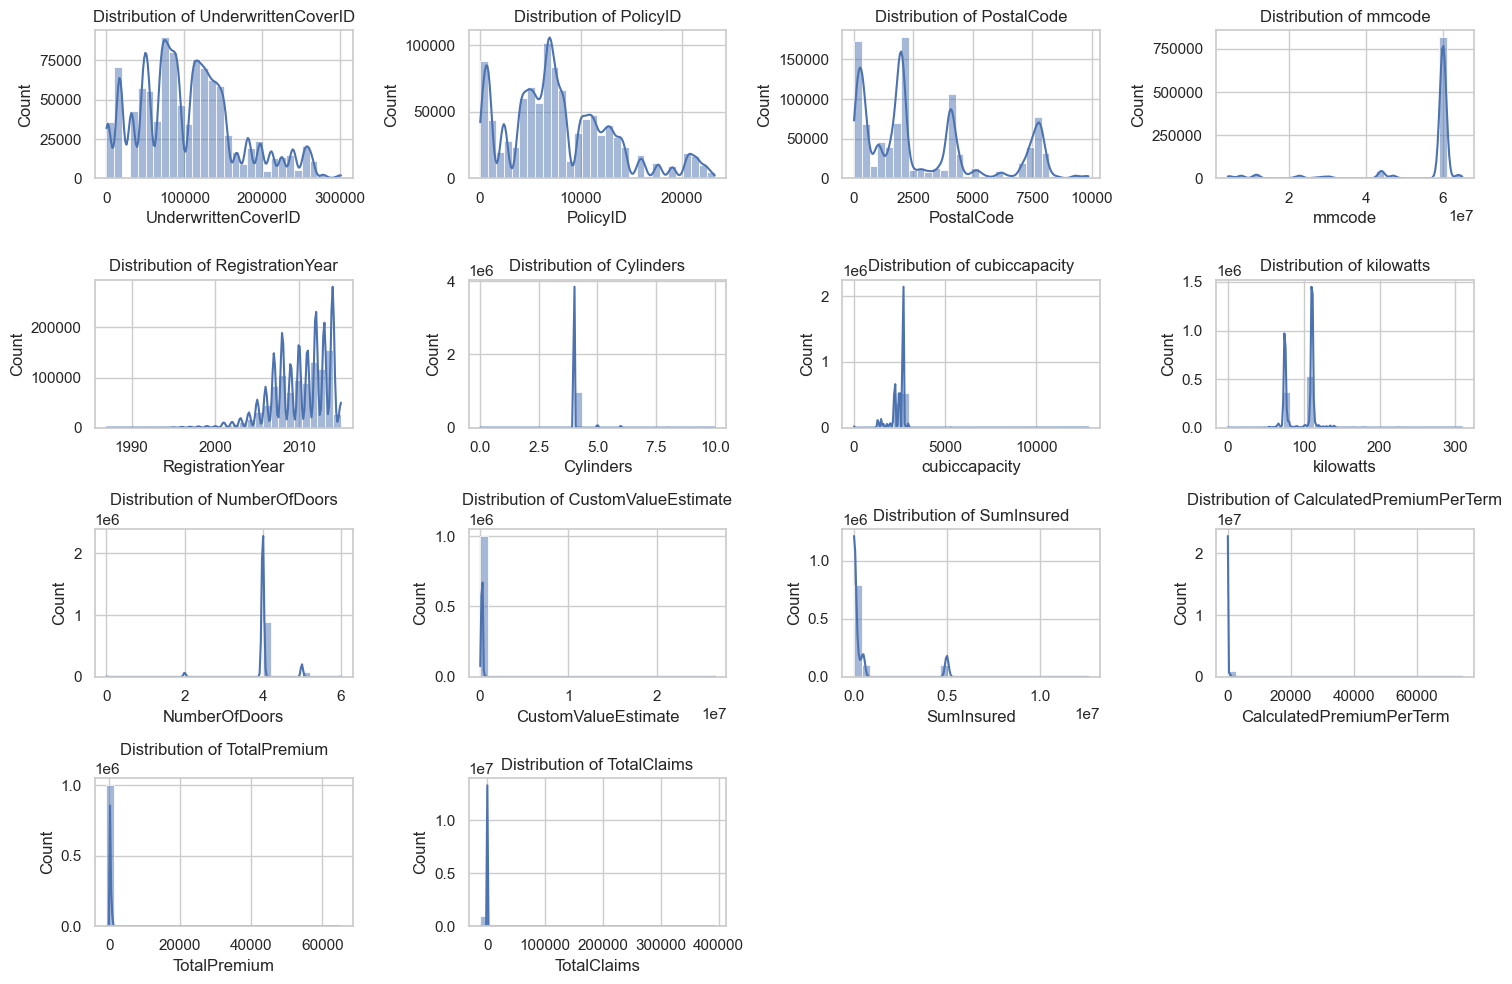

In [8]:
# Set the style
sns.set(style='whitegrid')

# Plot histograms for numerical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(4, 4, i)
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

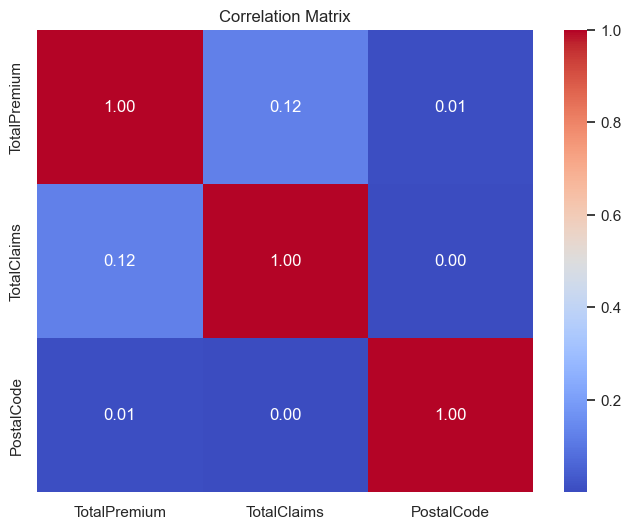

In [10]:
# Calculate the correlation matrix
correlation_matrix = df[['TotalPremium', 'TotalClaims', 'PostalCode']].corr()

# Heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

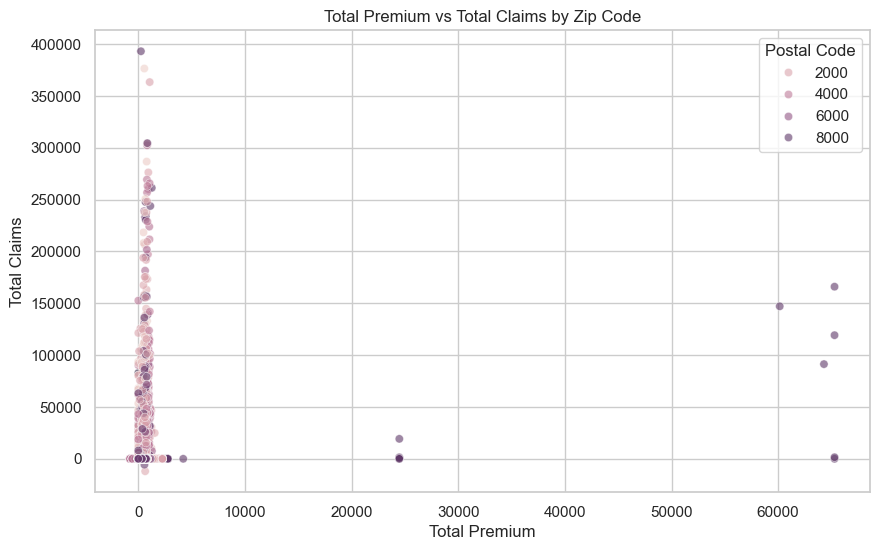

In [11]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='TotalPremium', y='TotalClaims', hue='PostalCode', alpha=0.6)
plt.title('Total Premium vs Total Claims by Zip Code')
plt.xlabel('Total Premium')
plt.ylabel('Total Claims')
plt.legend(title='Postal Code', bbox_to_anchor=(1, 1))
plt.show()

C:\Users\Admin.DESKTOP-M4R2VLU\AppData\Local\Temp\ipykernel_4816\12524972.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=geo_comparison, x='PostalCode', y='TotalPremium', palette='viridis')


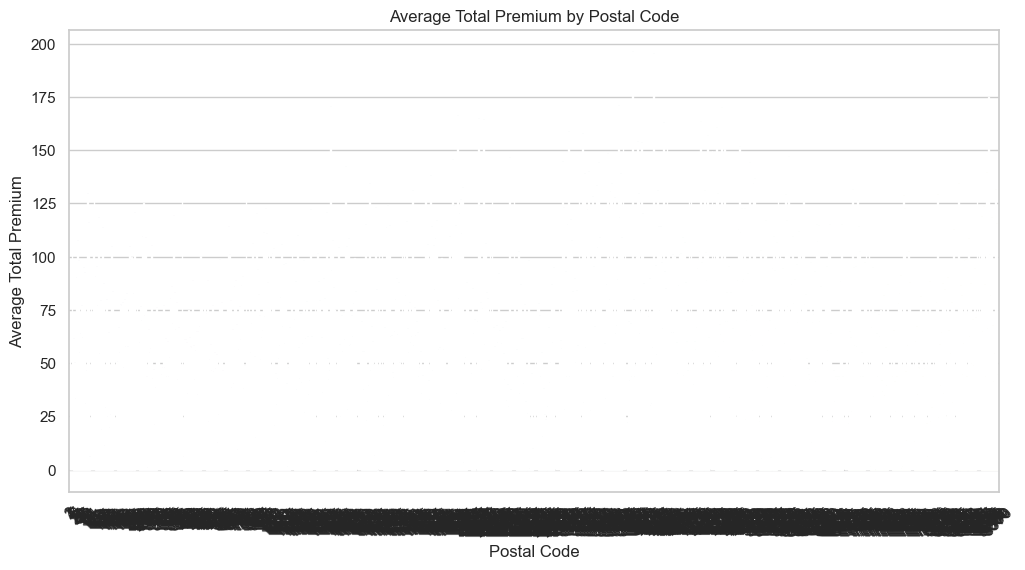

In [21]:
# Group by PostalCode and calculate mean TotalPremium and TotalClaims
geo_comparison = df.groupby('PostalCode')[['TotalPremium', 'TotalClaims']].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=geo_comparison, x='PostalCode', y='TotalPremium', palette='viridis')
plt.title('Average Total Premium by Postal Code')
plt.xlabel('Postal Code')
plt.ylabel('Average Total Premium')
plt.xticks(rotation=45)
plt.show()

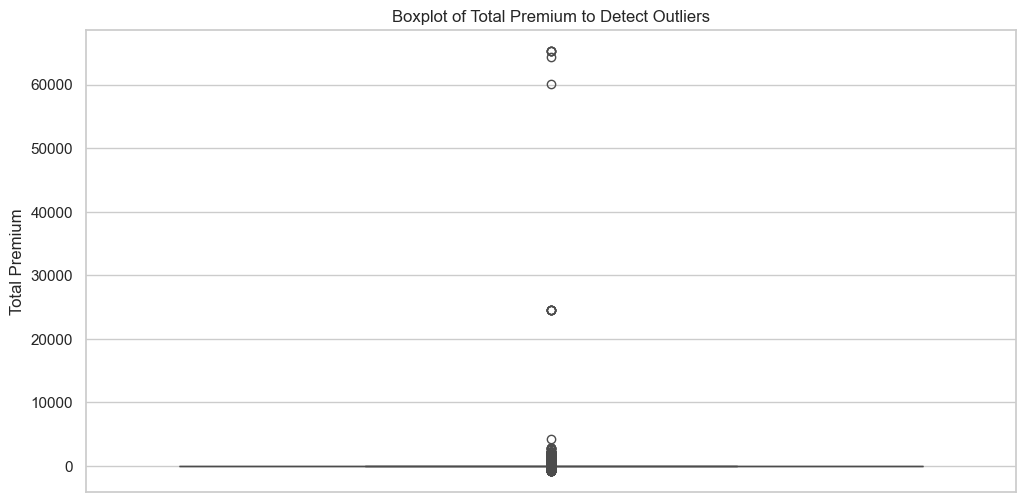

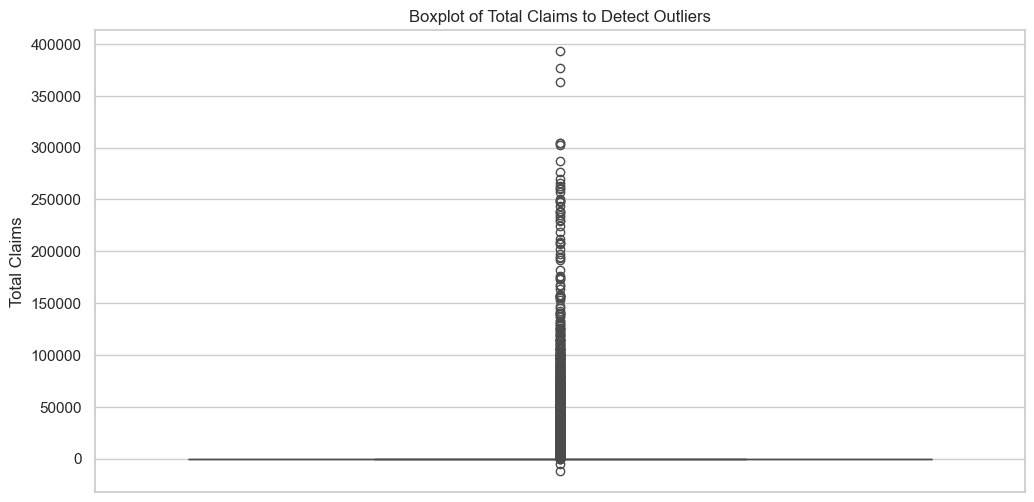

In [23]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, y='TotalPremium')
plt.title('Boxplot of Total Premium to Detect Outliers')
plt.ylabel('Total Premium')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, y='TotalClaims')
plt.title('Boxplot of Total Claims to Detect Outliers')
plt.ylabel('Total Claims')
plt.show()

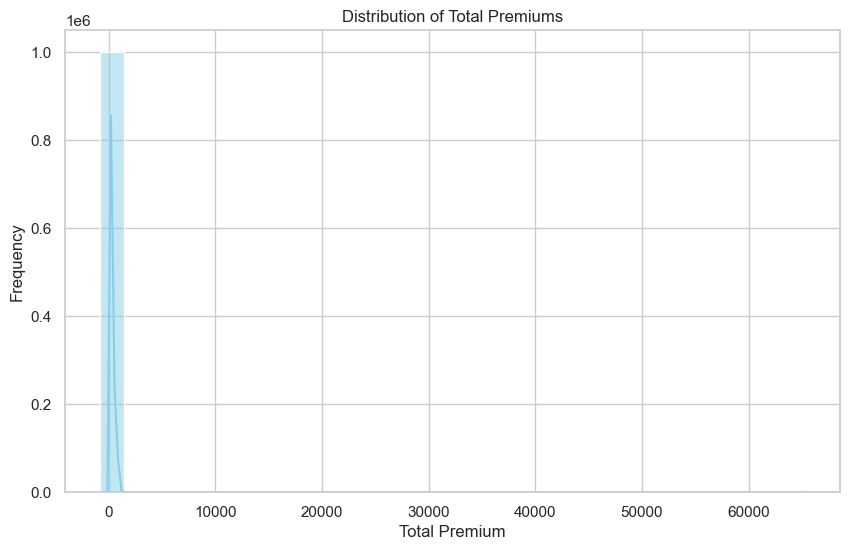

In [24]:
plt.figure(figsize=(10, 6))
sns.histplot(df['TotalPremium'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Total Premiums')
plt.xlabel('Total Premium')
plt.ylabel('Frequency')
plt.show()

C:\Users\Admin.DESKTOP-M4R2VLU\AppData\Local\Temp\ipykernel_4816\215915990.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='VehicleType', y='TotalPremium', palette='Set3')


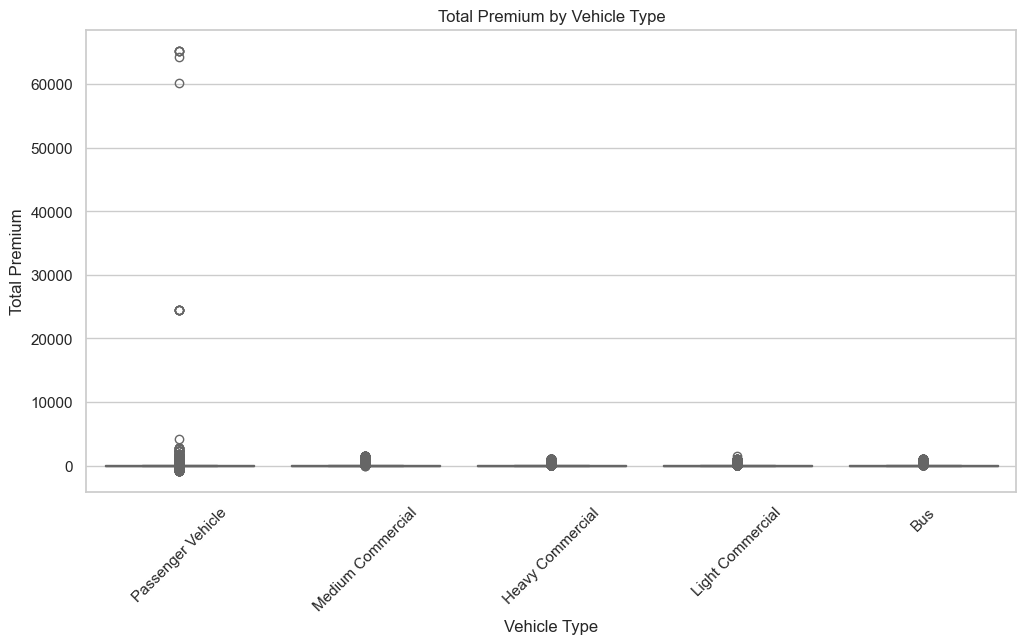

In [26]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='VehicleType', y='TotalPremium', palette='Set3')
plt.title('Total Premium by Vehicle Type')
plt.xlabel('Vehicle Type')
plt.ylabel('Total Premium')
plt.xticks(rotation=45)
plt.show()